In [94]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.dummy import DummyClassifier
from sklearn import preprocessing
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder

In [95]:
df = pd.read_csv('data/kc_house_data.csv')
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,NO,NONE,...,8 Good,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,NO,NONE,...,8 Good,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,NO,NONE,...,7 Average,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,NONE,...,8 Good,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287


In [96]:
df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [97]:
# We are converting all the Nulls with the the '0', or 'NO', or 'NONE' of their respective columns because they are 
# overwhelmingly the most common value, so we think it's a safe assumption.

df['waterfront'] = df['waterfront'].fillna('NO')
df['yr_renovated'].fillna(0.0, inplace=True)
df['view'].fillna('NONE', inplace=True)

df.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

Let's convert all the object types to int or float so we can put them in a linear regression.

In [99]:
# Take apart the date column, put it in to three columns as day month and year and have the values numeric.
df['date'] = pd.to_datetime(df['date'])
df['day_sold'] = df['date'].map(lambda x: x.day)
df['month_sold'] = df['date'].map(lambda x: x.month)
df['year_sold'] = df['date'].map(lambda x: x.year)
df.drop('date', axis=1, inplace=True)

In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   price          21597 non-null  float64
 2   bedrooms       21597 non-null  int64  
 3   bathrooms      21597 non-null  float64
 4   sqft_living    21597 non-null  int64  
 5   sqft_lot       21597 non-null  int64  
 6   floors         21597 non-null  float64
 7   waterfront     21597 non-null  object 
 8   view           21597 non-null  object 
 9   condition      21597 non-null  object 
 10  grade          21597 non-null  object 
 11  sqft_above     21597 non-null  int64  
 12  sqft_basement  21597 non-null  object 
 13  yr_built       21597 non-null  int64  
 14  yr_renovated   21597 non-null  float64
 15  zipcode        21597 non-null  int64  
 16  lat            21597 non-null  float64
 17  long           21597 non-null  float64
 18  sqft_l

In [101]:
# We simply convert the yes or no values to 1 and 0 respectively.
waterfront = preprocessing.LabelEncoder()
x1 = list(df['waterfront'])


waterfront.fit(x1)
waterfront_list = waterfront.transform(x1)
df['waterfront'] = waterfront_list
df['waterfront'].value_counts()


# 0 is NO WATERFRONT
# 1 is YES WATERFRONT

0    21451
1      146
Name: waterfront, dtype: int64

In [104]:
# Here we turn each unique value into a column and the column will have a 1 or 0 in it
# to say if that column is true for that house.
view = OneHotEncoder(sparse=False, handle_unknown='ignore')
x2 = df[['view']]
view.fit(x2)
view.transform(x2)
view_array = view.transform(x2)
view_panda = pd.DataFrame(view_array, columns=('View_Average', 'View_Excellent', 'View_Fair', 'View_Good', 'View_None'), index=df.index)
df = pd.concat([df, view_panda], axis=1)


In [105]:
# Do the same as we did for view.
condition = OneHotEncoder(sparse=False, handle_unknown='ignore')
X3 = df[['condition']]
condition.fit(X3)
condition.transform(X3)
condition_array = condition.transform(X3)
condition_panda = pd.DataFrame(condition_array, columns=('Cond_Average', 
                                                         'Cond_Fair','Cond_Good','Cond_Fair','Cond_VeryGood'), index=df.index)
df = pd.concat([df, condition_panda], axis=1)

In [106]:
# And again the same for grade.
grade = OneHotEncoder(sparse=False, handle_unknown='ignore')
x4 = df[['grade']]
grade.fit(x4)
grade_array = grade.transform(x4)
grade_panda = pd.DataFrame(grade_array, columns=
('10 Very Good', '11 Excellent', '12 Luxary', '13 Mansion', '3 Poor',
 '4 Low', '5 Fair', '6 Low Average', '7 Average', '8 Good',
 '9 Better'),index=df.index)
df = pd.concat([df, grade_panda], axis=1)

In [108]:
# Convert all the ? values to 0.0 like we did for the other columns.
# Then convert the values from strings to int

df['sqft_basement'] = df["sqft_basement"].replace({"?": '0.0'})
df['sqft_basement'] = df['sqft_basement'].astype(float)

In [109]:
df['sqft_basement'].value_counts()

0.0       13280
600.0       217
500.0       209
700.0       208
800.0       201
          ...  
915.0         1
295.0         1
1281.0        1
2130.0        1
906.0         1
Name: sqft_basement, Length: 303, dtype: int64

In [111]:
# We can drop the original columns that we just converted.
df.drop(columns=('condition'), inplace=True)
df.drop(columns=('view'), inplace=True)
df.drop(columns=('grade'), inplace=True)

In [112]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 46 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              21597 non-null  int64  
 1   price           21597 non-null  float64
 2   bedrooms        21597 non-null  int64  
 3   bathrooms       21597 non-null  float64
 4   sqft_living     21597 non-null  int64  
 5   sqft_lot        21597 non-null  int64  
 6   floors          21597 non-null  float64
 7   waterfront      21597 non-null  int64  
 8   sqft_above      21597 non-null  int64  
 9   sqft_basement   21597 non-null  float64
 10  yr_built        21597 non-null  int64  
 11  yr_renovated    21597 non-null  float64
 12  zipcode         21597 non-null  int64  
 13  lat             21597 non-null  float64
 14  long            21597 non-null  float64
 15  sqft_living15   21597 non-null  int64  
 16  sqft_lot15      21597 non-null  int64  
 17  day_sold        21597 non-null 

We now have zero missing values and everything is int or float.
We can start working on our base model.

In [113]:
df.corr()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,sqft_above,sqft_basement,...,11 Excellent,12 Luxary,13 Mansion,3 Poor,4 Low,5 Fair,6 Low Average,7 Average,8 Good,9 Better
id,1.000000,-0.016772,0.001150,0.005162,-0.012241,-0.131911,0.018608,-0.003599,-0.010799,-0.004359,...,-0.019837,-0.015084,-0.003880,-0.005110,-0.002903,-0.025640,-0.015476,-0.015575,0.042285,0.009121
price,-0.016772,1.000000,0.308787,0.525906,0.701917,0.089876,0.256804,0.264306,0.605368,0.321108,...,0.357589,0.291068,0.211806,-0.005155,-0.031618,-0.084549,-0.209463,-0.316053,0.004576,0.235859
bedrooms,0.001150,0.308787,1.000000,0.514508,0.578212,0.032471,0.177944,-0.002127,0.479386,0.297229,...,0.116596,0.062257,0.039026,-0.017434,-0.068012,-0.113175,-0.239492,-0.104791,0.073140,0.160294
bathrooms,0.005162,0.525906,0.514508,1.000000,0.755758,0.088373,0.502582,0.063629,0.686668,0.278485,...,0.247293,0.159734,0.095118,-0.012087,-0.055599,-0.138740,-0.366185,-0.313457,0.189426,0.264756
sqft_living,-0.012241,0.701917,0.578212,0.755758,1.000000,0.173453,0.353953,0.104637,0.876448,0.428660,...,0.345964,0.238136,0.144424,-0.011565,-0.053935,-0.127198,-0.312486,-0.358915,0.071115,0.318499
sqft_lot,-0.131911,0.089876,0.032471,0.088373,0.173453,1.000000,-0.004814,0.021459,0.184139,0.015031,...,0.077104,0.061699,0.007767,-0.000348,0.000440,0.022931,-0.019116,-0.067791,-0.023923,0.049646
floors,0.018608,0.256804,0.177944,0.502582,0.353953,-0.004814,1.000000,0.020797,0.523989,-0.241866,...,0.118735,0.054276,0.021257,-0.006230,-0.029964,-0.080346,-0.230529,-0.308247,0.201188,0.244184
waterfront,-0.003599,0.264306,-0.002127,0.063629,0.104637,0.021459,0.020797,1.000000,0.071778,0.083050,...,0.068410,0.082899,-0.002025,-0.000561,-0.002919,0.012691,-0.007301,-0.045482,-0.011317,0.007487
sqft_above,-0.010799,0.605368,0.479386,0.686668,0.876448,0.184139,0.523989,0.071778,1.000000,-0.051175,...,0.342198,0.222177,0.126666,-0.010429,-0.047669,-0.108543,-0.280761,-0.387255,0.059423,0.343388
sqft_basement,-0.004359,0.321108,0.297229,0.278485,0.428660,0.015031,-0.241866,0.083050,-0.051175,1.000000,...,0.076299,0.079831,0.063423,-0.004421,-0.022388,-0.059784,-0.120907,-0.019855,0.035518,0.017906


<AxesSubplot:>

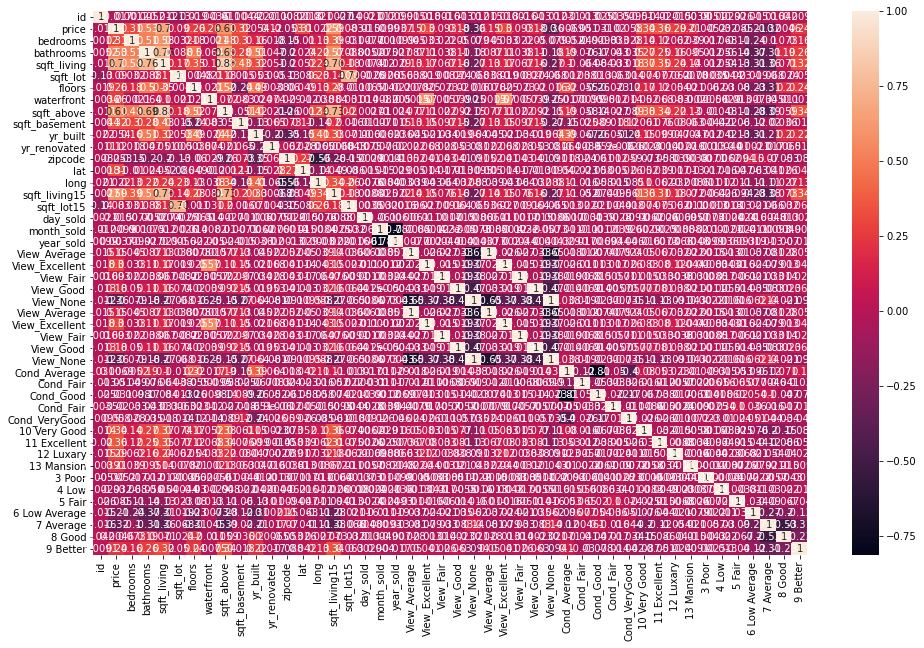

In [114]:
plt.figure(figsize=(16, 10))
sns.heatmap(data=df.corr(), annot=True)